In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("wat-all.csv")
df

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_address_id,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,892,1
1,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,2261,0
2,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,359,0
3,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,2261,0
4,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504035,3152966,8,3,2,0x4d2c0,1,2,1,4,16,27,11,0,0,3152948,1205,1
504036,3152967,8,3,2,0x4d2c0,1,3,1,4,16,27,11,0,0,3152948,1205,1
504037,3152967,9,4,2,0x4d2c0,1,4,2,4,16,27,11,0,0,3152948,1205,1
504038,3152968,4,3,1,0x4d2c0,1,0,0,4,16,27,11,0,0,3152948,1205,1


In [11]:
dff = pd.DataFrame(df['packet_address'], columns=['packet_address'])
le = LabelEncoder()
encode = dff[dff.columns[:]].apply(le.fit_transform)
df['packet_address_id'] = encode
df

,time,router,outport,inport,packet_address,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_address_id,target
0,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,1160,1
1,7,1,1,0,0xecf40,0,0,3,2,8,1,1,29,13,3,3066,0
2,7,0,2,0,0x1dc0,0,0,3,2,8,0,0,23,7,3,1160,0
3,11,5,1,3,0xecf40,0,0,3,2,8,1,1,29,13,3,3066,0
4,11,1,2,4,0x1dc0,0,0,3,2,8,0,0,23,7,3,1160,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504035,3152966,8,3,2,0x4d2c0,1,2,1,4,16,27,11,0,0,3152948,2349,1
504036,3152967,8,3,2,0x4d2c0,1,3,1,4,16,27,11,0,0,3152948,2349,1
504037,3152967,9,4,2,0x4d2c0,1,4,2,4,16,27,11,0,0,3152948,2349,1
504038,3152968,4,3,1,0x4d2c0,1,0,0,4,16,27,11,0,0,3152948,2349,1


In [12]:
df.corr()

,time,router,outport,inport,packet_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,enq_time,packet_address_id,target
time,1.000000,0.025157,-0.016825,0.016375,0.045872,-0.000019,-0.000020,-0.041161,-0.045102,-0.023185,-0.002798,0.045011,0.054493,1.000000,-0.201906,0.047745
router,0.025157,1.000000,0.311228,0.047617,-0.042331,0.002395,-0.003780,0.178998,0.169018,0.297251,0.425807,-0.110032,0.016156,0.025157,-0.036129,0.002485
outport,-0.016825,0.311228,1.000000,-0.359564,-0.108256,0.006052,-0.009565,0.482558,0.516584,0.509907,0.459022,-0.485092,-0.401589,-0.016820,0.011772,0.003407
inport,0.016375,0.047617,-0.359564,1.000000,0.111575,-0.006102,0.009632,-0.488682,-0.578135,-0.490140,-0.403628,0.515266,0.464305,0.016370,0.000855,0.007999
packet_type,0.045872,-0.042331,-0.108256,0.111575,1.000000,0.008387,-0.013272,-0.395071,-0.430033,-0.211123,-0.175386,0.210071,0.173351,0.045874,-0.013021,0.007953
flit_id,-0.000019,0.002395,0.006052,-0.006102,0.008387,1.000000,0.079060,0.107364,0.083671,0.012444,0.010379,-0.012476,-0.010481,-0.000023,-0.000006,-0.000004
flit_type,-0.000020,-0.003780,-0.009565,0.009632,-0.013272,0.079060,1.000000,-0.169743,-0.132280,-0.019663,-0.016404,0.019717,0.016574,-0.000024,0.000005,0.000019
vnet,-0.041161,0.178998,0.482558,-0.488682,-0.395071,0.107364,-0.169743,1.000000,0.977135,0.930521,0.768846,-0.931435,-0.773016,-0.041155,0.011678,-0.007137
vc,-0.045102,0.169018,0.516584,-0.578135,-0.430033,0.083671,-0.132280,0.977135,1.000000,0.902311,0.735741,-0.914002,-0.765335,-0.045096,0.013860,-0.008493
src_ni,-0.023185,0.297251,0.509907,-0.490140,-0.211123,0.012444,-0.019663,0.930521,0.902311,1.000000,0.925837,-0.935948,-0.776937,-0.023179,-0.003014,-0.004519


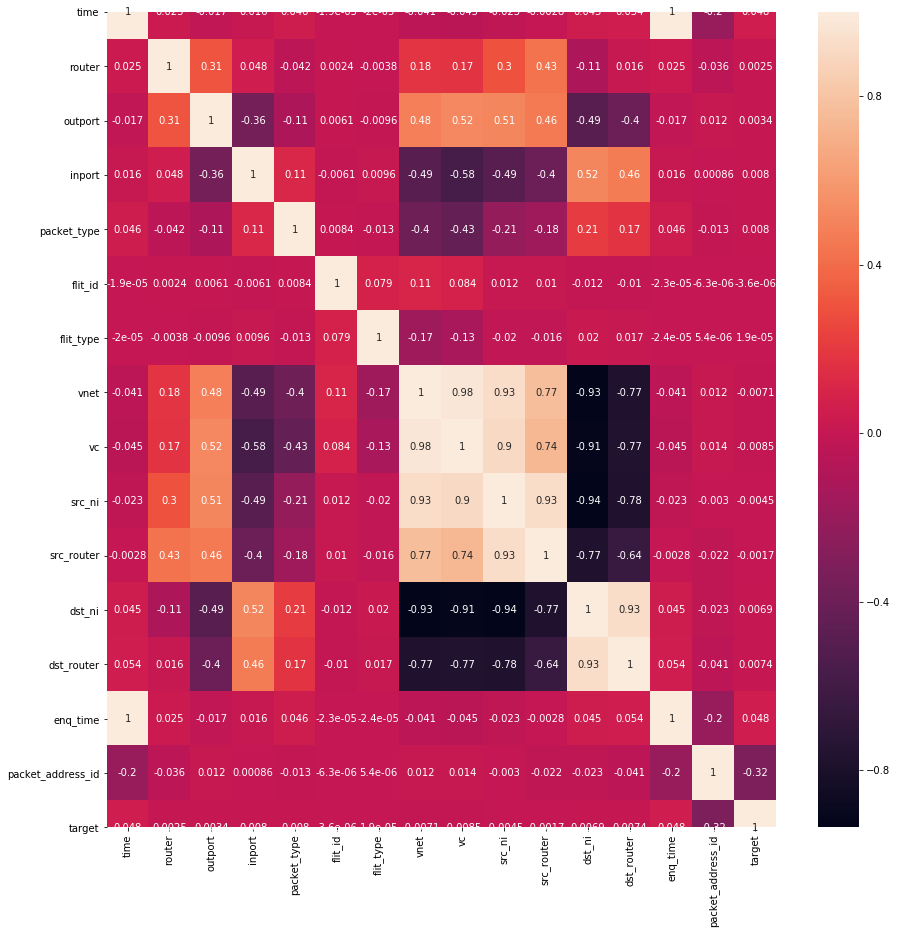

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [69]:
train_X = df.drop(columns=['target','time','packet_address','packet_address_id'])

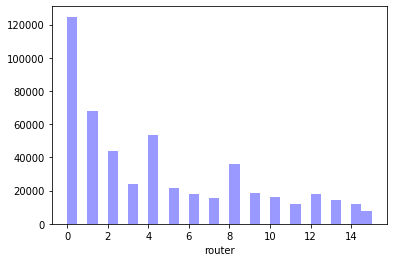

In [70]:
sns.distplot(df['router'], kde = False, bins=30, color='blue')

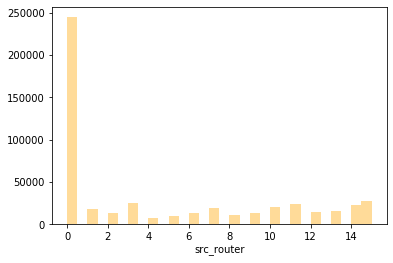

In [93]:
sns.distplot(df['src_router'], kde = False, bins=30, color='orange')

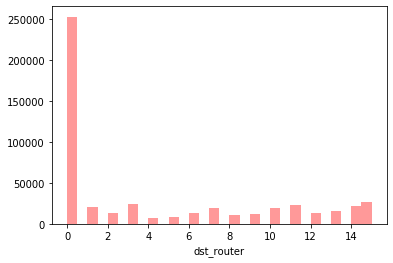

In [17]:
sns.distplot(df['dst_router'], kde = False, bins=30, color='red')

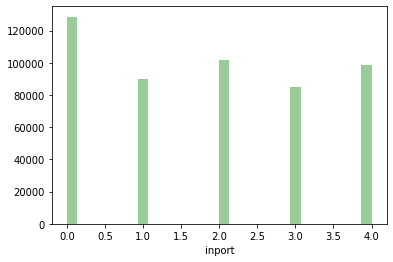

In [22]:
sns.distplot(df['inport'], kde = False, bins=30, color='green')
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}

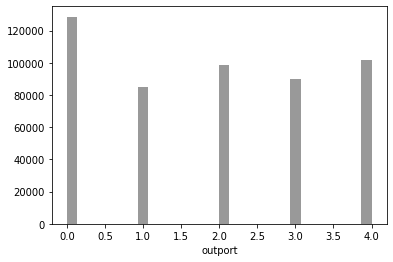

In [23]:
sns.distplot(df['outport'], kde = False, bins=30, color='black')
direction = {'Local': 0,'North': 1, 'East': 2, 'South':3,'West':4}

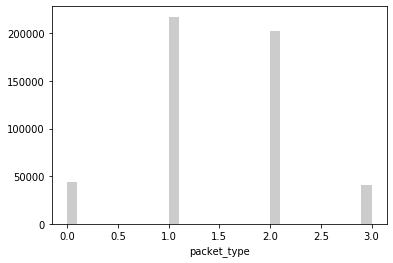

In [24]:
sns.distplot(df['packet_type'], kde = False, bins=30, color='grey')
data = {'GETX': 0,'DATA': 1, 'PUTX': 2, 'WB_ACK':3}

Text(0, 0.5, 'time')

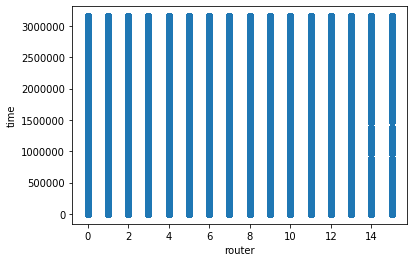

In [25]:
# scatter plot
fig, ax = plt.subplots()

ax.scatter(df['router'], df['time'])
# set a title and labels
ax.set_xlabel('router')
ax.set_ylabel('time')

In [29]:
df_500 = pd.read_csv('wat-all.csv',nrows=500)

Text(0, 0.5, 'time')

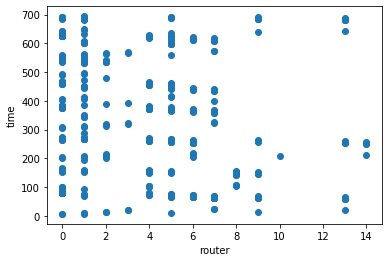

In [30]:
# scatter plot 500

fig, ax = plt.subplots()

ax.scatter(df_500['router'], df_500['time'])

# set a title and labels
ax.set_xlabel('router')
ax.set_ylabel('time')

Text(0, 0.5, 'Frequency')

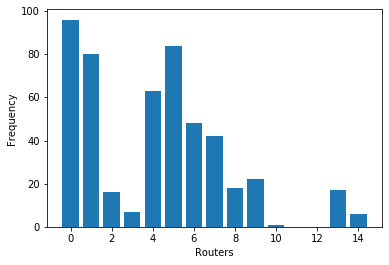

In [31]:
# bar chart by router

fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df_500['router'].value_counts()

# get x and y data 
points = data.index 
frequency = data.values

# create bar chart 
ax.bar(points, frequency)

# set title and labels 
ax.set_xlabel('Routers') 
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

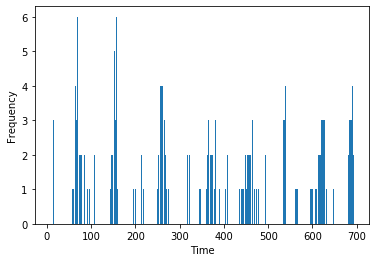

In [32]:
# bar chart by time

fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df_500['time'].value_counts()

# get x and y data 
points = data.index 
frequency = data.values

# create bar chart 
ax.bar(points, frequency)

# set title and labels 
ax.set_xlabel('Time') 
ax.set_ylabel('Frequency')

In [72]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000000,0.50,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0
1,0.066667,0.25,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0
2,0.000000,0.50,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0
3,0.333333,0.25,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.032258,0.066667,0.935484,0.866667,0.0
4,0.066667,0.50,1.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.741935,0.466667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504035,0.533333,0.75,0.50,0.333333,0.50,0.333333,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0
504036,0.533333,0.75,0.50,0.333333,0.75,0.333333,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0
504037,0.600000,1.00,0.50,0.333333,1.00,0.666667,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0
504038,0.266667,0.75,0.25,0.333333,0.00,0.000000,1.0,0.727273,0.870968,0.733333,0.000000,0.000000,1.0


In [73]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
0,1.000000,0.311228,0.047617,-0.042331,0.002395,-0.003780,0.178998,0.169018,0.297251,0.425807,-0.110032,0.016156,0.025157,0.002485
1,0.311228,1.000000,-0.359564,-0.108256,0.006052,-0.009565,0.482558,0.516584,0.509907,0.459022,-0.485092,-0.401589,-0.016820,0.003407
2,0.047617,-0.359564,1.000000,0.111575,-0.006102,0.009632,-0.488682,-0.578135,-0.490140,-0.403628,0.515266,0.464305,0.016370,0.007999
3,-0.042331,-0.108256,0.111575,1.000000,0.008387,-0.013272,-0.395071,-0.430033,-0.211123,-0.175386,0.210071,0.173351,0.045874,0.007953
4,0.002395,0.006052,-0.006102,0.008387,1.000000,0.079060,0.107364,0.083671,0.012444,0.010379,-0.012476,-0.010481,-0.000023,-0.000004
5,-0.003780,-0.009565,0.009632,-0.013272,0.079060,1.000000,-0.169743,-0.132280,-0.019663,-0.016404,0.019717,0.016574,-0.000024,0.000019
6,0.178998,0.482558,-0.488682,-0.395071,0.107364,-0.169743,1.000000,0.977135,0.930521,0.768846,-0.931435,-0.773016,-0.041155,-0.007137
7,0.169018,0.516584,-0.578135,-0.430033,0.083671,-0.132280,0.977135,1.000000,0.902311,0.735741,-0.914002,-0.765335,-0.045096,-0.008493
8,0.297251,0.509907,-0.490140,-0.211123,0.012444,-0.019663,0.930521,0.902311,1.000000,0.925837,-0.935948,-0.776937,-0.023179,-0.004519
9,0.425807,0.459022,-0.403628,-0.175386,0.010379,-0.016404,0.768846,0.735741,0.925837,1.000000,-0.773110,-0.641794,-0.002794,-0.001668


In [74]:
train_Y = corr_df['target']

In [75]:
train_Y.value_counts()

0    258373
1    245667
Name: target, dtype: int64

#### machine learning models

In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.3, random_state=0)

In [77]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [78]:
logit_model=sm.Logit(train_Y,train_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.691601
         Iterations 4
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.002      
Dependent Variable: target           AIC:              697214.6474
Date:               2020-05-02 11:05 BIC:              697359.3428
No. Observations:   504040           Log-Likelihood:   -3.4859e+05
Df Model:           12               LL-Null:          -3.4921e+05
Df Residuals:       504027           LLR p-value:      7.5057e-258
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     4.0000                                        
---------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
---------------------------------------------------------------------
0      -0.0241      0.0125    -1.9225    0.0545    -0.0487     0.0005
1       0.0615      0.0096     6.4326    

In [79]:
logreg = LogisticRegression(C=1,penalty='l2',random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
y_pred = logreg.predict(X_test)
print('Accuracy {:.2f}'.format(accuracy_score(y_test,y_pred)))
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Accuracy 0.51
Train Prediction Score 51.4083349394039
Test Prediction  51.290241515223656


In [81]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[48902 28798]
 [44857 28655]]


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.63      0.57     77700
           1       0.50      0.39      0.44     73512

    accuracy                           0.51    151212
   macro avg       0.51      0.51      0.50    151212
weighted avg       0.51      0.51      0.51    151212



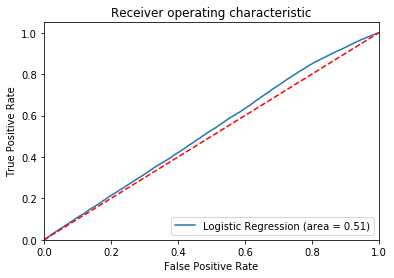

In [83]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [84]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
y_pred_knn= knn.predict(X_test)

In [86]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 64.21032344371763
Test Prediction  39.07163452636034


In [65]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[57617 20083]
 [20816 52696]]


In [66]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74     77700
           1       0.72      0.72      0.72     73512

    accuracy                           0.73    151212
   macro avg       0.73      0.73      0.73    151212
weighted avg       0.73      0.73      0.73    151212



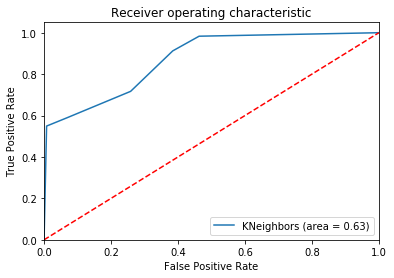

In [50]:
logit_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [51]:
#supportvectormachines
from sklearn.svm import SVC

In [ ]:
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

In [ ]:
y_pred_ksvc= ksvc.predict(X_test)

In [ ]:
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

In [ ]:
cm = confusion_matrix(y_test, y_pred_ksvc)
print(cm)

In [ ]:
print(classification_report(y_test,y_pred_ksvc))

In [87]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [88]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
y_pred_nb= nb.predict(X_test)

In [90]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 51.60616504359064
Test Prediction Score 51.728037457344655


In [56]:
cm = confusion_matrix(y_test, y_pred_nb)
print(cm)

[[70331  7369]
 [31931 41581]]


In [57]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.91      0.78     77700
           1       0.85      0.57      0.68     73512

    accuracy                           0.74    151212
   macro avg       0.77      0.74      0.73    151212
weighted avg       0.77      0.74      0.73    151212



In [91]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [92]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=10, validation_split=0.4 )

Train on 211696 samples, validate on 141132 samples
Epoch 1/10
211696/211696 [==============================] - 27s 130us/step - loss: 0.6949 - accuracy: 0.5071 - val_loss: 0.6922 - val_accuracy: 0.5122
Epoch 2/10
211696/211696 [==============================] - 27s 127us/step - loss: 0.6915 - accuracy: 0.5118 - val_loss: 0.6909 - val_accuracy: 0.5130
Epoch 3/10
211696/211696 [==============================] - 28s 133us/step - loss: 0.6906 - accuracy: 0.5132 - val_loss: 0.6908 - val_accuracy: 0.5122
Epoch 4/10
211696/211696 [==============================] - 25s 119us/step - loss: 0.6903 - accuracy: 0.5113 - val_loss: 0.6900 - val_accuracy: 0.5159
Epoch 5/10
211696/211696 [==============================] - 25s 119us/step - loss: 0.6900 - accuracy: 0.5145 - val_loss: 0.6899 - val_accuracy: 0.5155
Epoch 6/10
211696/211696 [==============================] - 27s 129us/step - loss: 0.6898 - accuracy: 0.5136 - val_loss: 0.6897 - val_accuracy: 0.5143
Epoch 7/10
211696/211696 [================

In [94]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(4, activation='relu', input_shape=(n_cols,)))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 211696 samples, validate on 141132 samples
Epoch 1/20
211696/211696 [==============================] - 22s 102us/step - loss: 0.2502 - accuracy: 0.5094 - val_loss: 0.2499 - val_accuracy: 0.5110
Epoch 2/20
211696/211696 [==============================] - 21s 100us/step - loss: 0.2499 - accuracy: 0.5110 - val_loss: 0.2499 - val_accuracy: 0.5119
Epoch 3/20
211696/211696 [==============================] - 21s 98us/step - loss: 0.2499 - accuracy: 0.5115 - val_loss: 0.2499 - val_accuracy: 0.5122
Epoch 4/20
211696/211696 [==============================] - 21s 97us/step - loss: 0.2499 - accuracy: 0.5119 - val_loss: 0.2499 - val_accuracy: 0.5123
Epoch 5/20
211696/211696 [==============================] - 23s 107us/step - loss: 0.2499 - accuracy: 0.5119 - val_loss: 0.2499 - val_accuracy: 0.5122
Epoch 6/20
211696/211696 [==============================] - 23s 107us/step - loss: 0.2499 - accuracy: 0.5119 - val_loss: 0.2499 - val_accuracy: 0.5122
Epoch 7/20
211696/211696 [==================

In [96]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.2 )

Train on 282262 samples, validate on 70566 samples
Epoch 1/20
282262/282262 [==============================] - 23s 83us/step - loss: 0.2507 - accuracy: 0.5058 - val_loss: 0.2498 - val_accuracy: 0.5111
Epoch 2/20
282262/282262 [==============================] - 24s 85us/step - loss: 0.2498 - accuracy: 0.5123 - val_loss: 0.2498 - val_accuracy: 0.5111
Epoch 3/20
282262/282262 [==============================] - 25s 87us/step - loss: 0.2498 - accuracy: 0.5123 - val_loss: 0.2497 - val_accuracy: 0.5111
Epoch 4/20
282262/282262 [==============================] - 23s 81us/step - loss: 0.2497 - accuracy: 0.5123 - val_loss: 0.2497 - val_accuracy: 0.5111
Epoch 5/20
282262/282262 [==============================] - 23s 81us/step - loss: 0.2497 - accuracy: 0.5123 - val_loss: 0.2496 - val_accuracy: 0.5111
Epoch 6/20
282262/282262 [==============================] - 23s 81us/step - loss: 0.2496 - accuracy: 0.5123 - val_loss: 0.2496 - val_accuracy: 0.5111
Epoch 7/20
282262/282262 [=======================

In [97]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
model.fit(X_train, y_train, epochs=20, validation_split=0.4 )

Train on 211696 samples, validate on 141132 samples
Epoch 1/20
211696/211696 [==============================] - 23s 110us/step - loss: 0.2500 - accuracy: 0.5097 - val_loss: 0.2498 - val_accuracy: 0.5135
Epoch 2/20
211696/211696 [==============================] - 22s 103us/step - loss: 0.2498 - accuracy: 0.5126 - val_loss: 0.2497 - val_accuracy: 0.5153
Epoch 3/20
211696/211696 [==============================] - 22s 104us/step - loss: 0.2498 - accuracy: 0.5132 - val_loss: 0.2497 - val_accuracy: 0.5152
Epoch 4/20
211696/211696 [==============================] - 21s 101us/step - loss: 0.2497 - accuracy: 0.5136 - val_loss: 0.2497 - val_accuracy: 0.5145
Epoch 5/20
211696/211696 [==============================] - 19s 91us/step - loss: 0.2497 - accuracy: 0.5135 - val_loss: 0.2496 - val_accuracy: 0.5151
Epoch 6/20
211696/211696 [==============================] - 19s 91us/step - loss: 0.2497 - accuracy: 0.5143 - val_loss: 0.2496 - val_accuracy: 0.5156
Epoch 7/20
211696/211696 [==================